In [585]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

In [586]:
df=pd.read_csv('Travel.csv')
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [587]:
# Data cleaning

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [588]:
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [589]:
df['Gender'].value_counts()

Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64

In [590]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: count, dtype: int64

In [591]:
df['TypeofContact'].value_counts()

TypeofContact
Self Enquiry       3444
Company Invited    1419
Name: count, dtype: int64

In [592]:
df['Gender']=df['Gender'].replace('Fe Male', 'Female')
df['MaritalStatus']=df['MaritalStatus'].replace('Single', 'Unmarried')

In [593]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [594]:
# Check missing values

features_with_na = [features for features in df.columns if df[features].isnull().sum()>=1]
for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean()*100,5), '% missing values')

Age 4.62357 % missing values
TypeofContact 0.51146 % missing values
DurationOfPitch 5.13502 % missing values
NumberOfFollowups 0.92062 % missing values
PreferredPropertyStar 0.53191 % missing values
NumberOfTrips 2.86416 % missing values
NumberOfChildrenVisiting 1.35025 % missing values
MonthlyIncome 4.76678 % missing values


In [595]:
# statisctics of numerical features with missing values
# if any outliners are present we can use median to fill missing values
df[features_with_na].select_dtypes(exclude='object').describe()

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
count,4662.000000,4637.000000,4843.000000,4862.000000,4748.000000,4822.000000,4655.000000
mean,37.622265,15.490835,3.708445,3.581037,3.236521,1.187267,23619.853491
std,9.316387,8.519643,1.002509,0.798009,1.849019,0.857861,5380.698361
min,18.000000,5.000000,1.000000,3.000000,1.000000,0.000000,1000.000000
25%,31.000000,9.000000,3.000000,3.000000,2.000000,1.000000,20346.000000
50%,36.000000,13.000000,4.000000,3.000000,3.000000,1.000000,22347.000000
75%,44.000000,20.000000,4.000000,4.000000,4.000000,2.000000,25571.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,3.000000,98678.000000


In [596]:
# Replace missing values with median and mode for object values

df.Age.fillna(df.Age.median(), inplace=True)
df.TypeofContact.fillna(df.TypeofContact.mode()[0], inplace=True)
df.DurationOfPitch.fillna(df.DurationOfPitch.median(), inplace=True)
df.NumberOfFollowups.fillna(df.NumberOfFollowups.mode()[0], inplace = True)
df.PreferredPropertyStar.fillna(df.PreferredPropertyStar.mode()[0], inplace=True)
df.NumberOfTrips.fillna(df.NumberOfTrips.median(), inplace=True)
df.NumberOfChildrenVisiting.fillna(df.NumberOfChildrenVisiting.mode()[0], inplace=True)
df.MonthlyIncome.fillna(df.MonthlyIncome.median(), inplace=True)


In [597]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [598]:
df.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [599]:
df.drop('CustomerID', axis=1, inplace=True)

In [600]:
# Feature Engineering

In [601]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ProdTaken                 4888 non-null   int64  
 1   Age                       4888 non-null   float64
 2   TypeofContact             4888 non-null   object 
 3   CityTier                  4888 non-null   int64  
 4   DurationOfPitch           4888 non-null   float64
 5   Occupation                4888 non-null   object 
 6   Gender                    4888 non-null   object 
 7   NumberOfPersonVisiting    4888 non-null   int64  
 8   NumberOfFollowups         4888 non-null   float64
 9   ProductPitched            4888 non-null   object 
 10  PreferredPropertyStar     4888 non-null   float64
 11  MaritalStatus             4888 non-null   object 
 12  NumberOfTrips             4888 non-null   float64
 13  Passport                  4888 non-null   int64  
 14  PitchSat

In [602]:
df['TotalVisiting']=df['NumberOfChildrenVisiting']+df['NumberOfFollowups']
df.drop(columns=['NumberOfChildrenVisiting','NumberOfFollowups'], axis=1, inplace=True)

In [603]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisiting
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0,3.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,6.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,Basic,3.0,Unmarried,7.0,1,3,0,Executive,17090.0,4.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,4.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,3.0


In [604]:
# get all numeric features
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print('Number of numerical features: ', len(num_features))

Number of numerical features:  12


In [605]:
# Discrete features
discrete_features = [feature for feature in num_features if len(df[feature].unique())<25]
print('Discrete features: ', len(discrete_features))

Discrete features:  9


In [606]:
continuous_features = [feature for feature in num_features if feature not in discrete_features]
print('Continuous features: ', len(continuous_features))

Continuous features:  3


In [607]:
# Train test split and model training
from sklearn.model_selection import train_test_split
X = df.drop(['ProdTaken'], axis=1)
y = df['ProdTaken']

In [608]:
X.head()

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisiting
0,41.0,Self Enquiry,3,6.0,Salaried,Female,3,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0,3.0
1,49.0,Company Invited,1,14.0,Salaried,Male,3,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,6.0
2,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,Basic,3.0,Unmarried,7.0,1,3,0,Executive,17090.0,4.0
3,33.0,Company Invited,1,9.0,Salaried,Female,2,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,4.0
4,36.0,Self Enquiry,1,8.0,Small Business,Male,2,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,3.0


In [609]:
y.value_counts()

ProdTaken
0    3968
1     920
Name: count, dtype: int64

In [610]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3910, 17), (978, 17), (3910,), (978,))

In [611]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     4888 non-null   float64
 1   TypeofContact           4888 non-null   object 
 2   CityTier                4888 non-null   int64  
 3   DurationOfPitch         4888 non-null   float64
 4   Occupation              4888 non-null   object 
 5   Gender                  4888 non-null   object 
 6   NumberOfPersonVisiting  4888 non-null   int64  
 7   ProductPitched          4888 non-null   object 
 8   PreferredPropertyStar   4888 non-null   float64
 9   MaritalStatus           4888 non-null   object 
 10  NumberOfTrips           4888 non-null   float64
 11  Passport                4888 non-null   int64  
 12  PitchSatisfactionScore  4888 non-null   int64  
 13  OwnCar                  4888 non-null   int64  
 14  Designation             4888 non-null   

In [612]:
cat_features=X.select_dtypes(include='object').columns
num_features=X.select_dtypes(exclude='object').columns

In [613]:
X.select_dtypes(include='object').columns

Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')

In [614]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder(drop='first')

preproccessor = ColumnTransformer(
    transformers=[
        ('OneHotEncoder', oh_transformer, cat_features),
        ('StandardScaler', numeric_transformer, num_features)
    ]
    )

In [615]:
preproccessor

,transformers,"[('OneHotEncoder', ...), ('StandardScaler', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,categories,'auto'
,drop,'first'
,sparse_output,True


In [616]:
X_train=preproccessor.fit_transform(X_train)
X_test=preproccessor.transform(X_test)

In [617]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.721400,-1.020350,-1.252472,-0.725271,-0.127737,-0.632399,0.679690,0.782966,-0.382245,0.739144
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,-0.721400,0.690023,0.129347,-0.725271,1.511598,-0.632399,0.679690,0.782966,-0.459799,0.739144
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.721400,-1.020350,0.129347,1.771041,0.418708,-0.632399,0.679690,0.782966,-0.245196,0.065158
3,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,-0.721400,-1.020350,0.129347,-0.725271,-0.127737,-0.632399,1.408395,-1.277194,0.213475,0.739144
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.721400,2.400396,1.511165,-0.725271,1.511598,-0.632399,-0.049015,-1.277194,-0.024889,0.065158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3905,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.721400,-0.653841,0.129347,-0.725271,-0.674182,-0.632399,-1.506426,0.782966,-0.536973,1.413130
3906,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.455047,-0.898180,0.129347,1.771041,-1.220627,-0.632399,1.408395,0.782966,1.529609,-0.608828
3907,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.455047,1.545210,0.129347,-0.725271,2.058043,-0.632399,-0.777720,0.782966,-0.360576,0.739144
3908,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.455047,1.789549,0.129347,-0.725271,-0.127737,-0.632399,-1.506426,0.782966,-0.252799,1.413130


In [618]:
# ML train - Rabdom forest classifier

In [619]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score,roc_auc_score

In [ ]:
models = {
    'LogisticRegression': LogisticRegression(),
    'DescisionTree': DecisionTreeClassifier(),
    'RandomForest': RandomForestClassifier()
}

for i in range(len(models)):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    y_train_pred = model.predict(X_train)  # Predict train set
    y_test_pred = model.predict(X_test)  # Predict test set

    # Train metrics
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    model_train_precision = precision_score(y_train, y_train_pred)
    model_train_recall = recall_score(y_train, y_train_pred)
    model_train_rocauc_score=roc_auc_score(y_train,y_train_pred)

    # Test metrics
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    model_test_precision = precision_score(y_test, y_test_pred)
    model_test_recall = recall_score(y_test, y_test_pred)
    model_test_rocauc_score=roc_auc_score(y_test,y_test_pred)

    print(list(models.keys())[i])

    print('Model performance on Train set')
    print('Accuracy: ', model_train_accuracy)
    print('F1 Score: ', model_train_f1)

    print('Precision: ', model_train_precision)
    print('Recall: ', model_train_recall)
    print('ROC-AUC Score: ', model_train_rocauc_score)

    print('\n--------------------------------\n')

    print('Model performance on Test set')
    print('Accuracy: ', model_test_accuracy)
    print('F1 Score: ', model_test_f1)
    print('Precision: ', model_test_precision)
    print('Recall: ', model_test_recall)
    print('ROC-AUC Score: ', model_test_rocauc_score)

    print('\n=================================\n')


LogisticRegression
Model performance on Train set
Accuracy:  0.8447570332480818
F1 Score:  0.8172993823564432
Precision:  0.7033333333333334
Recall:  0.289437585733882
ROC-AUC Score:  0.6307294813296886

--------------------------------

Model performance on Test set
Accuracy:  0.8425357873210634
F1 Score:  0.8165580257528814
Precision:  0.7228915662650602
Recall:  0.31413612565445026
ROC-AUC Score:  0.6424556104765263


DescisionTree
Model performance on Train set
Accuracy:  1.0
F1 Score:  1.0
Precision:  1.0
Recall:  1.0
ROC-AUC Score:  1.0

--------------------------------

Model performance on Test set
Accuracy:  0.908997955010225
F1 Score:  0.9089074192924248
Precision:  0.7684210526315789
Recall:  0.7643979057591623
ROC-AUC Score:  0.854244696208679


RandomForest
Model performance on Train set
Accuracy:  1.0
F1 Score:  1.0
Precision:  1.0
Recall:  1.0
ROC-AUC Score:  1.0

--------------------------------

Model performance on Test set
Accuracy:  0.9202453987730062
F1 Score:  0.9

In [621]:
# Hyperparameter tuning for Random Forest Classifier
rf_params = {
    'max_depth': [5, 8, 10, 15, None],
    'max_features': ['auto', 5,7,8],
    'min_samples_split': [2, 8, 15, 20],
    'n_estimators': [100, 200, 500,1000],
}

In [622]:
randomcv_models = [
    ('RF', RandomForestClassifier(), rf_params)
]

In [623]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}

for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                param_distributions=params,
                                n_iter=100,
                                cv=3,
                                verbose=2,
                                n_jobs=-1)
    random.fit(X_train,y_train)
    model_param[name]=random.best_params_

for model_name in model_param:
    print(f'--------------Best Params for {model_name}------------')
    print(model_param[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits
--------------Best Params for RF------------
{'n_estimators': 200, 'min_samples_split': 2, 'max_features': 7, 'max_depth': None}


In [624]:
models = {
    # 'LogisticRegression': LogisticRegression(),
    # 'DescisionTree': DecisionTreeClassifier(),
    'RandomForest': RandomForestClassifier(n_estimators=100, min_samples_split=2, max_features=7,
                                           max_depth=None )
}

for i in range(len(models)):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    y_train_pred = model.predict(X_train)  # Predict train set
    y_test_pred = model.predict(X_test)  # Predict test set

    # Train metrics
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    model_train_precision = precision_score(y_train, y_train_pred)
    model_train_recall = recall_score(y_train, y_train_pred)
    model_train_rocauc_score=roc_auc_score(y_train,y_train_pred)

    # Test metrics
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    model_test_precision = precision_score(y_test, y_test_pred)
    model_test_recall = recall_score(y_test, y_test_pred)
    model_test_rocauc_score=roc_auc_score(y_test,y_test_pred)

    print(list(models.keys())[i])

    print('Model performance on Train set')
    print('Accuracy: ', model_train_accuracy)
    print('F1 Score: ', model_train_f1)

    print('Precision: ', model_train_precision)
    print('Recall: ', model_train_recall)
    print('ROC-AUC Score: ', model_train_rocauc_score)

    print('\n--------------------------------\n')

    print('Model performance on Test set')
    print('Accuracy: ', model_test_accuracy)
    print('F1 Score: ', model_test_f1)
    print('Precision: ', model_test_precision)
    print('Recall: ', model_test_recall)
    print('ROC-AUC Score: ', model_test_rocauc_score)

    print('\n=================================\n')


RandomForest
Model performance on Train set
Accuracy:  1.0
F1 Score:  1.0
Precision:  1.0
Recall:  1.0
ROC-AUC Score:  1.0

--------------------------------

Model performance on Test set
Accuracy:  0.9294478527607362
F1 Score:  0.9244937963113797
Precision:  0.9552238805970149
Recall:  0.6701570680628273
ROC-AUC Score:  0.831266589939927




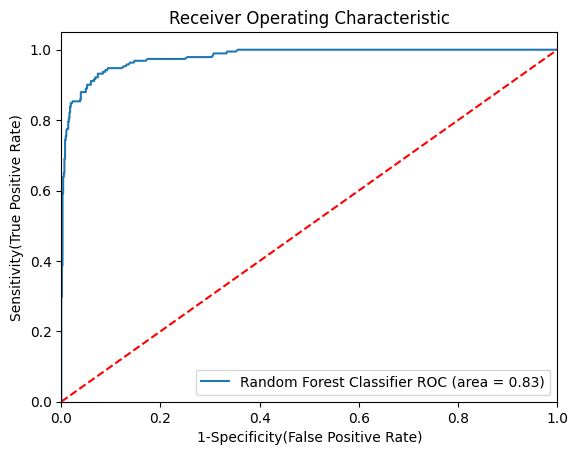

In [625]:
## Plot ROC AUC Curve
from sklearn.metrics import roc_curve
plt.figure()

# Add the models to the list that you want to view on the ROC plot
auc_models = [
{
    'label': 'Random Forest Classifier',
    'model': RandomForestClassifier(n_estimators=1000,min_samples_split=2,
                                          max_features=7,max_depth=None),
    'auc':  0.8325
},
    
]
# create loop through all model
for algo in auc_models:
    model = algo['model'] # select the model
    model.fit(X_train, y_train) # train the model
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
# Calculate Area under the curve to display on the plot
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (algo['label'], algo['auc']))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig("auc.png")
plt.show() 